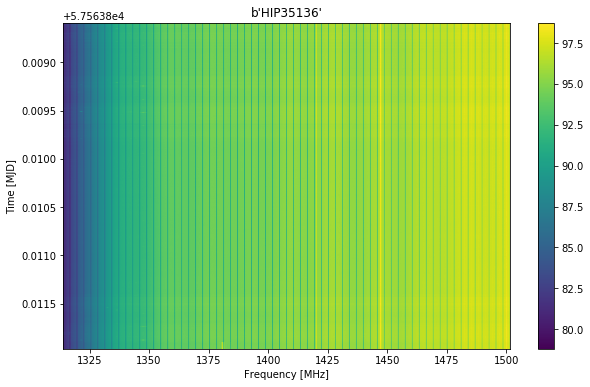

In [43]:
#working directly from breakthrough/GBT/filterbank_tutorial/Filterbank Tutorial (public).ipynb
#https://github.com/UCBerkeleySETI/breakthrough/blob/master/GBT/filterbank_tutorial/Filterbank%20Tutorial%20(public).ipynb

from blimpy3 import Filterbank
import matplotlib.pyplot as plt
%matplotlib inline

#possible filterbank files
fil1='voyager_f1032192_t300_v2.fil' #from voyager tutorial
fil2='blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0002.fil' #smallest voyager.fil from http://setiathome.berkeley.edu/~mattl/ml/
fil3='blc04_guppi_57563_69862_HIP35136_0011.gpuspec.0002.fil' #from filterbank tutorial

fil = Filterbank(fil3)

plt.figure(figsize=(10,6))
fil.plot_waterfall() 
fig = plt.gcf()
fig.savefig("justwork3.png", bbox_inches="tight")

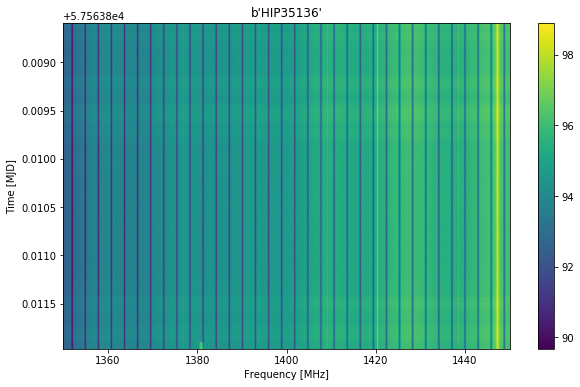

In [44]:
plt.figure(figsize=(10,6))
fil.plot_waterfall(f_start=1350, f_stop=1450)
fig = plt.gcf()
fig.savefig("justwork4.png", bbox_inches="tight")

extracting integration 99...


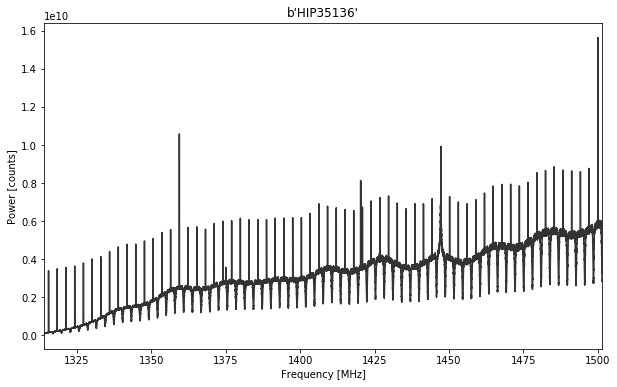

In [30]:
plt.figure(figsize=(10,6))
fil.plot_spectrum(t=99)

extracting integration 99...


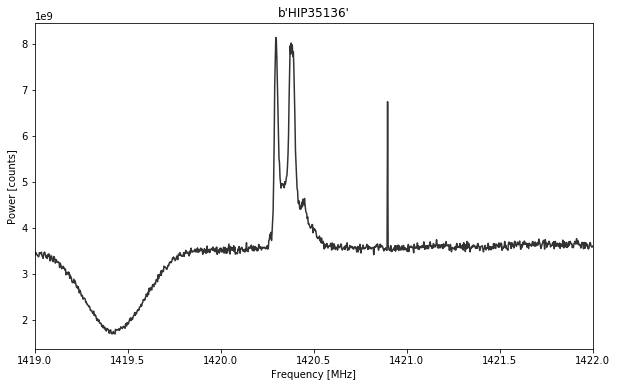

In [31]:
plt.figure(figsize=(10,6))
fil.plot_spectrum(t=99, f_start=1419, f_stop=1422)

In [32]:
fil.info()

     rawdatafile : b'guppi_57563_69862_HIP35136_0011.0000.raw'
     source_name :                      b'HIP35136'
      machine_id :                               20
    telescope_id :                                6
         src_raj :                      7:15:50.064
         src_dej :                      47:14:20.04
        az_start :                              0.0
        za_start :                              0.0
       data_type :                                1
            fch1 :               1501.4634132385254
            foff :             -0.00286102294921875
          nchans :                            65536
          nbeams :                                1
           ibeam :                                1
           nbits :                               32
          tstart :               57563.808587962965
           tsamp :               1.0737418239999998
            nifs :                                1

Num ints in file :                              273


In [33]:
freqs = fil.freqs
print(freqs)
print(type(freqs))
print(len(freqs))

[ 1313.96627426  1313.96913528  1313.97199631 ...,  1501.45769119
  1501.46055222  1501.46341324]
<class 'numpy.ndarray'>
65536


In [34]:
data = fil.data
print(data.shape)
print(type(data))

(273, 1, 65536)
<class 'numpy.ndarray'>


In [35]:
powers100 = data[99]
print(powers100)
powers100 = powers100[0]
print(powers100)
print(len(powers100))

[[  7.93240480e+07   7.71738160e+07   7.91451840e+07 ...,   2.83483008e+09
    2.88591744e+09   2.88578304e+09]]
[  7.93240480e+07   7.71738160e+07   7.91451840e+07 ...,   2.83483008e+09
   2.88591744e+09   2.88578304e+09]
65536


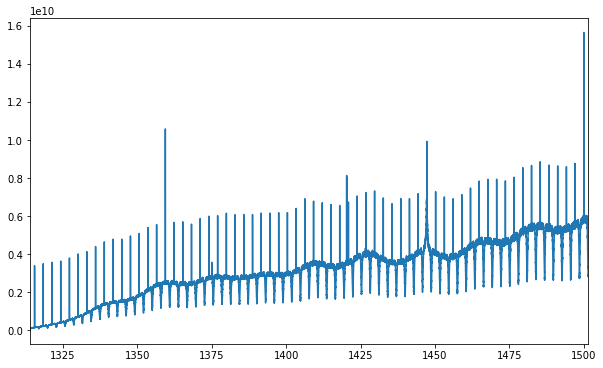

In [36]:
plt.figure(figsize=(10,6))
plt.plot(freqs, powers100)
plt.xlim(freqs[0], freqs[-1])
plt.show()

In [37]:
header = fil.header
print(header)

{'rawdatafile': b'guppi_57563_69862_HIP35136_0011.0000.raw', 'source_name': b'HIP35136', 'machine_id': 20, 'telescope_id': 6, 'src_raj': <Angle 7.263906666666666 hourangle>, 'src_dej': <Angle 47.238899999999994 deg>, 'az_start': 0.0, 'za_start': 0.0, 'data_type': 1, 'fch1': 1501.4634132385254, 'foff': -0.00286102294921875, 'nchans': 65536, 'nbeams': 1, 'ibeam': 1, 'nbits': 32, 'tstart': 57563.808587962965, 'tsamp': 1.0737418239999998, 'nifs': 1}


In [38]:
nchans = header['nchans']
print(nchans)

65536


In [39]:
from blimpy3 import read_header

header2 = read_header('blc04_guppi_57563_69862_HIP35136_0011.gpuspec.0002.fil')
print(header2)

{'rawdatafile': b'guppi_57563_69862_HIP35136_0011.0000.raw', 'source_name': b'HIP35136', 'machine_id': 20, 'telescope_id': 6, 'src_raj': <Angle 7.263906666666666 hourangle>, 'src_dej': <Angle 47.238899999999994 deg>, 'az_start': 0.0, 'za_start': 0.0, 'data_type': 1, 'fch1': 1501.4634132385254, 'foff': -0.00286102294921875, 'nchans': 65536, 'nbeams': 1, 'ibeam': 1, 'nbits': 32, 'tstart': 57563.808587962965, 'tsamp': 1.0737418239999998, 'nifs': 1}


In [40]:
"""
All these functions show the required modules imported within the function. This is simply to show as
clearly as possible which modules are required by each function. Of course, in general you should 
import all modules at the top of your script.
"""

def maxfreq(file):
    """Return central frequency of the highest-frequency bin in a .fil file.""" 
    
    from blimpy import read_header
    return read_header(file)['fch1']

def minfreq(file):
    """Return central frequency of the lowest-frequency bin in a .fil file"""
    
    from blimpy import read_header
    fch1 = read_header(file)['fch1']
    nchans = read_header(file)['nchans']
    ch_bandwidth = read_header(file)['foff']
    return fch1 + nchans*ch_bandwidth

def currentMJD():
    """Returns current MJD including decimals."""
    
    from astropy.time import Time
    print Time.now().mjd 

def AA(file): 
    """Returns Alt-Az coordinates (deg) for a given GBT .fil file.
    
    Args:
        file (str): .fil file
        
    Returns:
        altazdict (dict): Dictionary with alt and az in degrees.
    """
    
    from astropy import units as u
    from astropy.time import Time
    from astropy.coordinates import EarthLocation, SkyCoord, AltAz
    from blimpy import read_header
    
    GreenBank = EarthLocation(lat=38.4322*u.deg, lon=-79.8398*u.deg) #Western longitudes are negative
    MJD = read_header(file)['tstart']
    ra = read_header(file)['src_raj']
    dec = read_header(file)['src_dej']
    target = SkyCoord(ra, dec)
    altaz = target.transform_to(AltAz(location=GreenBank, obstime=Time(MJD, format='mjd')))
    altazdict = { 'alt' : altaz.alt.degree, 'az' : altaz.az.degree }
    return altazdict

def totalpower(file, integration, fmin, fmax): 
    
    """Use Simpson's rule numerical integration to find total power between 
    given freq bounds, for given time integration.
    
    Args:
        file (str): .fil file
        integration (int): .fil file integration number to analyze
        fmin (float): Lower freq bound
        fmax (float): Upper freq bound
        
    Returns:
        totalpower (float): total power (from Simpson's rule)
                            under the power spectrum curve 
                            between fmin and fmax
    """
    
    import numpy as np
    from scipy.integrate import simps
    from blimpy import read_header, Filterbank
    
    #Check for valid bounds
    maxfreq = read_header(file)['fch1']
    nchans = read_header(file)['nchans']
    ch_bandwidth = read_header(file)['foff']
    minfreq = maxfreq + nchans*ch_bandwidth
    if fmin < minfreq or fmax > maxfreq:
        raise ValueError("One of your freq constraints is out of the freq range of this filterbank file.")
    
    #Get data
    fil = Filterbank(file)
    freqs = np.array(fil.freqs)
    data = np.array(fil.data[integration][0]) 
    
    #Get freqs and power values from desired range
    idx = np.where(np.logical_and(freqs >= fmin, freqs <= fmax))
    newfreqs = freqs[idx]
    newdata = data[idx]
    
    #Integrate
    totalpower = simps(x=newfreqs, y=newdata)
    return totalpower

SyntaxError: invalid syntax (<ipython-input-40-91427a458e67>, line 26)

In [41]:
#from blimpy readme
#https://github.com/UCBerkeleySETI/blimpy/blob/master/README.md
#Waterfall doesn't work
from blimpy3 import Waterfall

fb = Waterfall(fil)
fb.info()
data = fb.data

AttributeError: 'Filterbank' object has no attribute 'split'